In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
url='/content/drive/MyDrive/Food_4loai'

In [3]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.1,rotation_range=0.1,width_shift_range=0.1,zoom_range=0.1)
train_data=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='validation')

Found 72 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 180000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               23040128  
                                                      

In [8]:
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=15,batch_size=10,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/15
8/8 [==============================] - 7s 787ms/step - loss: 2.1826 - accuracy: 0.3611 - val_loss: 1.0037 - val_accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 6s 702ms/step - loss: 1.0815 - accuracy: 0.4861 - val_loss: 0.9254 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 751ms/step - loss: 0.8836 - accuracy: 0.6389 - val_loss: 0.9888 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 6s 730ms/step - loss: 0.7068 - accuracy: 0.6389 - val_loss: 0.6770 - val_accuracy: 0.8750
Epoch 5/15
8/8 [==============================] - 6s 714ms/step - loss: 0.8149 - accuracy: 0.6667 - val_loss: 0.5255 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 6s 727ms/step - loss: 0.7758 - accuracy: 0.6389 - val_loss: 0.6545 - val_accuracy: 0.8750
Epoch 7/15
8/8 [==============================] - 6s 714ms/step - loss: 0.7176 - accuracy: 0.7083 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 8/15
8/8 [====

In [9]:
validation_dataset.class_indices

{'banh da lon': 0, 'banh hoi': 1, 'banh uot': 2, 'banh xeo': 3}

In [12]:
name=['banh da lon','banh hoi','banh uot','banh xeo']

banh da lon


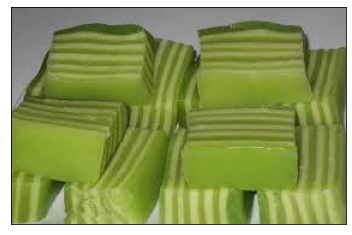

In [14]:
url='/content/banhuot.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])


banh xeo


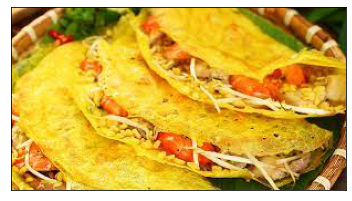

In [15]:
url='/content/banhxeo.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

banh hoi


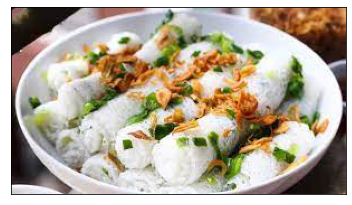

In [16]:
url='/content/banhhoi.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

banh uot


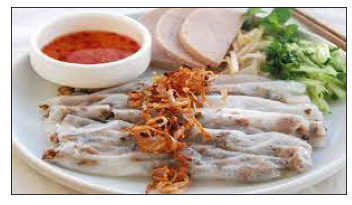

In [17]:
url='/content/banhuot1.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

In [19]:
model.save('/content/drive/MyDrive/Food_4loai/final_food.h5')